/home/ash/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


   H (m)  O (cumencs)  S (m3) x 10^6
0    130           20           1.00
1    131           34           1.69
2    132           57           2.85
3    133           96           4.80
4    134          162           8.12
5    136          463          23.10
6    137          781          39.10
7    138         1318          65.90
8    139         2226         111.00
[ 0.17793827 -0.45843508]
[ 0.27624821 -0.71068888]
0.1779382711420432


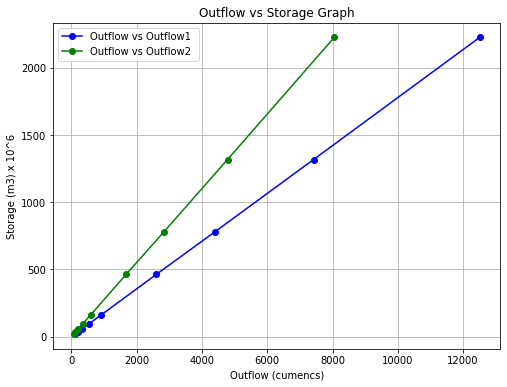

[0, 8.438478479289806, 37.463657627500645, 91.74714418750925, 165.85889369661564, 265.1981944152999, 397.69131759183455, 603.141732511671, 924.9816606009622, 1165.2052603952538, 1186.4854906662868, 1111.2234752165064, 1007.5844944692942, 891.005360021534, 774.9880676160636, 664.6708196337922, 559.8044932800532, 465.56677056501314, 383.51334120640433, 309.30811510978657, 243.7168753371887, 187.58875815056663, 141.6486513885102, 103.69439908352518, 73.01929145639967, 48.812242800703416, 31.440504204110884, 20.250939776209744]


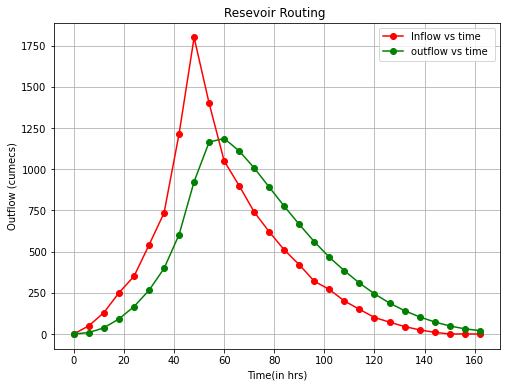

614 cumecs
 12 Hours


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
data = pd.read_csv("flow.csv")
print(data)

outflow = data.iloc[:,1]
storage = data.iloc[:,2]

outflow1 = 2*storage*(10**6)/(6*3600) + outflow
outflow2 = 2*storage*(10**6)/(6*3600) - outflow 

# print(outflow1)
T=  [0, 6, 12, 18, 24, 30, 36, 42, 48, 54,60, 66, 72, 78, 84, 90, 96, 102, 108, 114,120, 126, 132, 138, 144, 150, 156, 162]
I = [0, 50, 130, 250, 350, 540, 735, 1215, 1800, 1400, 1050, 900, 740, 620, 510, 420, 320, 270, 200, 150, 100, 72, 45, 25, 10, 0, 0, 0]

# for i in I:
#     print(i)


plt.figure(figsize=(8,6))
plt.plot(outflow1, outflow, marker='o', color='b', label="Outflow vs Outflow1 ")
plt.plot(outflow2, outflow, marker='o', color='g', label="Outflow vs Outflow2 ")

coeff_outflow1 = np.polyfit(outflow1, outflow, 1)  
coeff_outflow2 = np.polyfit(outflow2, outflow, 1)

print(coeff_outflow1)
print(coeff_outflow2)

slope1 = coeff_outflow1[0]
slope2 = coeff_outflow2[0]
incept1 = coeff_outflow1[1]
incept2 = coeff_outflow2[1]
print(slope1)

plt.xlabel("Outflow (cumencs)")
plt.ylabel("Storage (m3) x 10^6")
plt.title("Outflow vs Storage Graph")
plt.grid(True)
plt.legend()
plt.show()




xcord2=0
O=[0]

for i in range(0,len(I)-1):
    I1= I[i]
    I2= I[i+1]
    xcord1 = I1+I2 + xcord2
    ycord1 = xcord1*slope1 +incept1
    O.append(ycord1)
    ycord2 = ycord1 
    xcord2 = (ycord2-incept2)/slope2


print(O)


plt.figure(figsize=(8,6))
plt.plot(T, I, marker='o', color='r', label="Inflow vs time ")
plt.plot(T, O, marker='o', color='g', label="outflow vs time ")
plt.ylabel("Outflow (cumecs)")
plt.xlabel("Time(in hrs)")
plt.title("Resevoir Routing ")
plt.grid(True)
plt.legend()
plt.show()

max1 = max(O)
max2 = max(I)
time1 = O.index(max1)
time2 = I.index(max2)

peak_diff = max2-max1
print(f"{round(peak_diff)} cumecs")

lag = T[time1]-T[time2]
print(f" {lag} Hours")

